In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import csv
import numpy as np

In [2]:
df2=pd.read_csv('final_input_file.csv')
#df2

# Visualizing The Graph

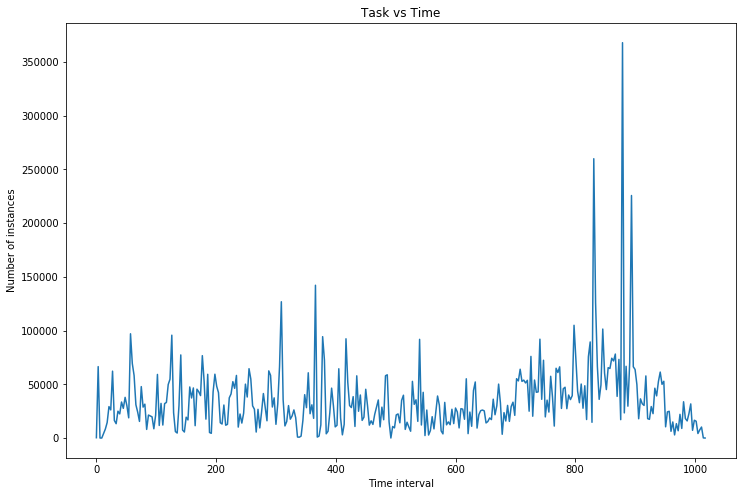

In [3]:
fig=plt.figure(figsize=(12,8))
plt.title("Task vs Time")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(df2.time_interval, df2.no_of_instances)
plt.show()

# Without Sliding Window_ARMA

Size= 221
Train 
 221
Test 
 119
Time, predicted, expected 
 663 27543 36142.0
Time, predicted, expected 
 666 30315 21670.0
Time, predicted, expected 
 669 27870 30017.0
Time, predicted, expected 
 672 29372 50175.0
Time, predicted, expected 
 675 32117 32833.0
Time, predicted, expected 
 678 29313 3486.0
Time, predicted, expected 
 681 25511 23640.0
Time, predicted, expected 
 684 28919 15839.0
Time, predicted, expected 
 687 27158 30368.0
Time, predicted, expected 
 690 29450 15484.0
Time, predicted, expected 
 693 26977 29322.0
Time, predicted, expected 
 696 29264 33343.0
Time, predicted, expected 
 699 29686 21100.0
Time, predicted, expected 
 702 27759 55211.0
Time, predicted, expected 
 705 32844 53157.0
Time, predicted, expected 
 708 32064 64017.0
Time, predicted, expected 
 711 34114 52712.0
Time, predicted, expected 
 714 32418 53887.0
Time, predicted, expected 
 717 33025 51242.0
Time, predicted, expected 
 720 32850 53711.0
Time, predicted, expected 
 723 33353 24971.0
Ti

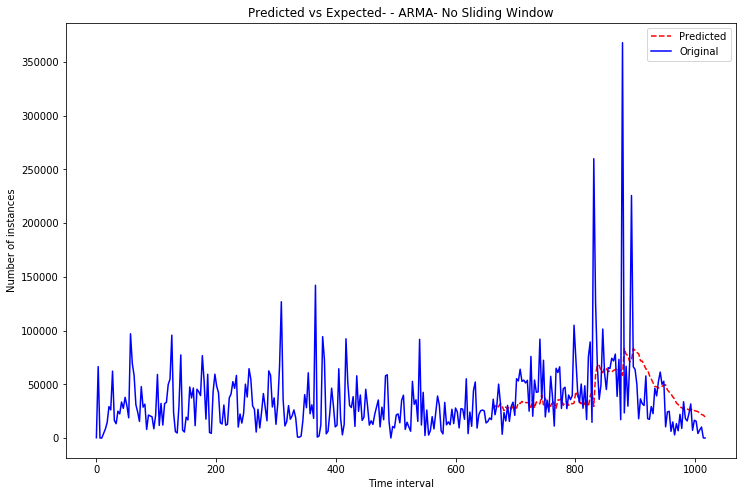

In [16]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
import numpy
import math
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARMA

#Computational Time
import time
time_start = time.clock()

X = df2.no_of_instances
X = X.astype('float32')
size = int(len(X) * 0.65)
print('Size=',size)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
#print('History \n', history)
print('Train \n', len(train))
print('Test \n', len(test))
#print('Train \n', train)
#print('Test \n', test)
predictions = list()
#for t in range(len(test)):
times=[]
SE=0
sumAPE=0
#sumMASE=0
for t in range (len(train),len(train)+len(test)):
    model = ARMA(history, order=(1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #print('OUTPUT= \n', output)
    yhat = int(output[0])
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('XYZ')
    times.append(df2.time_interval[t])
    print('Time, predicted, expected \n',df2.time_interval[t], yhat, obs)
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=abs((yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(test[t]-df2.no_of_instances[t-1]))
    #sumMASE=sumMASE+ASE
RMSE=math.sqrt(SE/len(test))
MAPE=(sumAPE/(len(test)))*100
#MASE=(sumMASE/(len(test)))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)

#print('Time= \n', times)

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)

# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- - ARMA- No Sliding Window")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(times, predictions, color='red', label='Predicted', linestyle='dashed')
plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original', linestyle='solid')
plt.legend()
plt.show()
